In [2]:
!!pip install git+https://github.com/ssut/py-hanspell.git

['Collecting git+https://github.com/ssut/py-hanspell.git',
 '  Cloning https://github.com/ssut/py-hanspell.git to /private/var/folders/y6/jr3h9z910tg95k3c63b732k40000gn/T/pip-req-build-m1_3xygq',
 '  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /private/var/folders/y6/jr3h9z910tg95k3c63b732k40000gn/T/pip-req-build-m1_3xygq',
 '  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8',
 '  Preparing metadata (setup.py): started',
 "  Preparing metadata (setup.py): finished with status 'done'",
 'Requirement already satisfied: requests in /Users/yj/opt/anaconda3/envs/usual_torch/lib/python3.8/site-packages (from py-hanspell==1.1) (2.27.1)',
 'Requirement already satisfied: urllib3<1.27,>=1.21.1 in /Users/yj/opt/anaconda3/envs/usual_torch/lib/python3.8/site-packages (from requests->py-hanspell==1.1) (1.26.9)',
 'Requirement already satisfied: certifi>=2017.4.17 in /Users/yj/opt/anaconda3/envs/usua

In [2]:
import pandas as pd
from hanspell import spell_checker

def safe_spell_checker(text):
    try:
        return spell_checker.check(text).checked
    except:
        return text

df = pd.read_csv('train.csv')
df['sentence_1'] = df['sentence_1'].apply(lambda x: safe_spell_checker(x))
df['sentence_2'] = df['sentence_2'].apply(lambda x: safe_spell_checker(x))
df.to_csv('train_spell.csv', index=False)


__위 spell_checker 라이브러리는 똑같이 따라하지 마세요. api오류를 해결하기위해 라이브러리 함수를 수정해서 똑같이 동작하지 않습니다.__

In [3]:
df2 = pd.read_csv('dev.csv')
df2['sentence_1'] = df2['sentence_1'].apply(lambda x: safe_spell_checker(x))
df2['sentence_2'] = df2['sentence_2'].apply(lambda x: safe_spell_checker(x))
df2.to_csv('dev_spell.csv', index=False)

In [4]:
df_dev = pd.read_csv('dev_spell.csv')
df_train = pd.read_csv('train_spell.csv')
df_concat = pd.concat([df_train, df_dev], ignore_index=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9874 entries, 0 to 9873
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9874 non-null   object 
 1   source        9874 non-null   object 
 2   sentence_1    9874 non-null   object 
 3   sentence_2    9874 non-null   object 
 4   label         9874 non-null   float64
 5   binary-label  9874 non-null   float64
dtypes: float64(2), object(4)
memory usage: 463.0+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

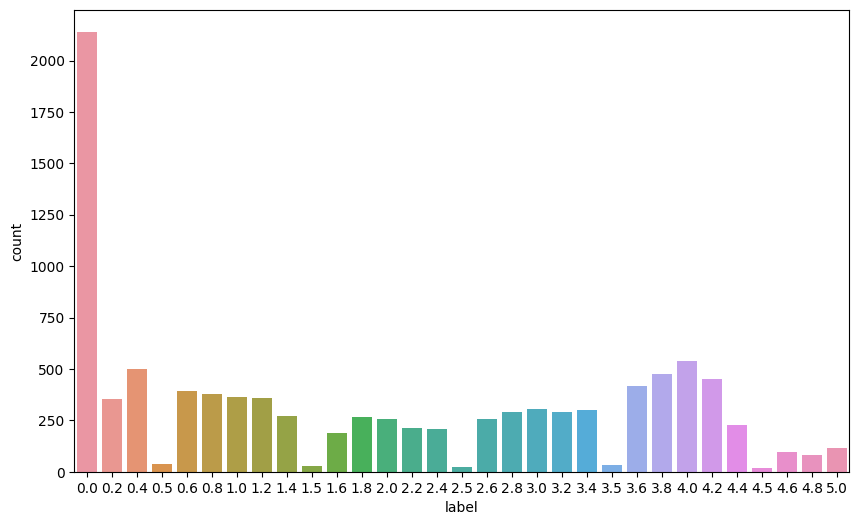

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data = df_concat,x = 'label')

In [6]:
import numpy as np
np.random.seed(42)
df_concat = df_concat.drop(df_concat[df_concat['label'] == 0.0].sample(frac=0.5).index)


Text(0.5, 1.0, 'validation')

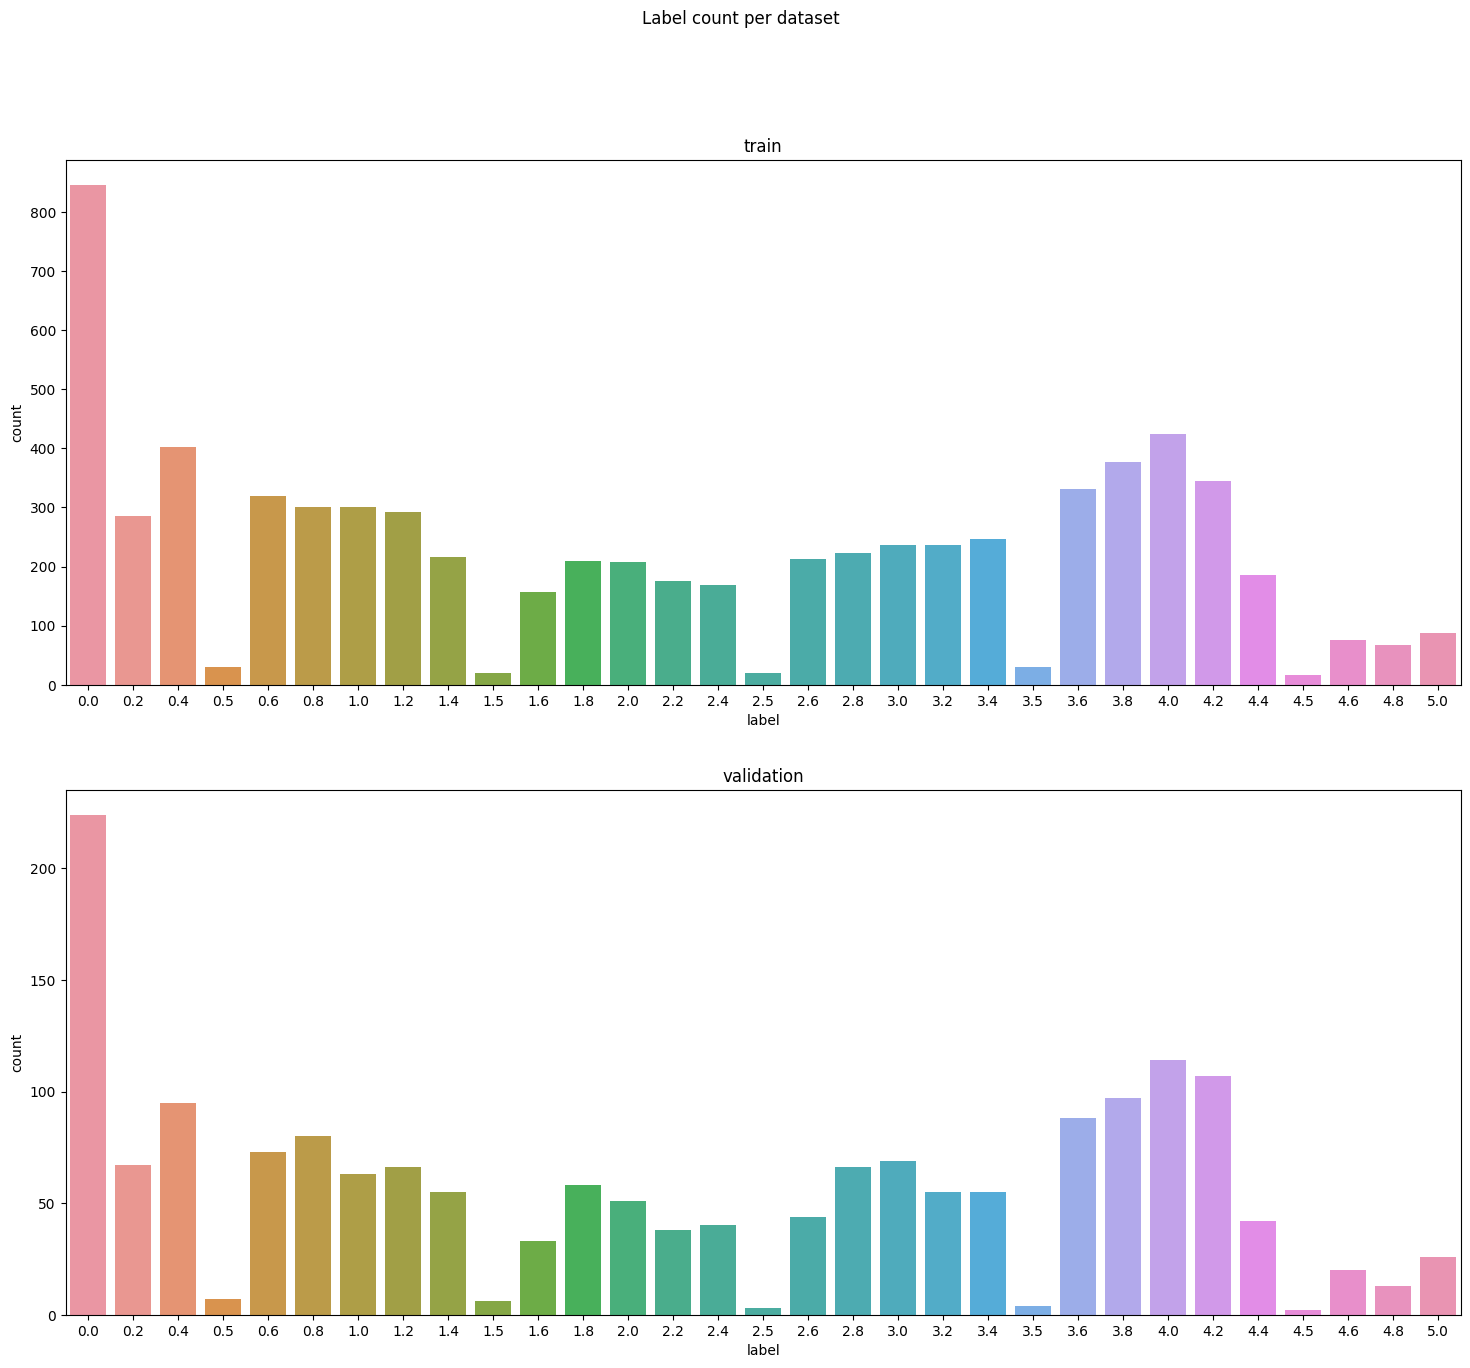

In [7]:
#split validation set from train set as 0.2
df_train = df_concat.sample(frac=0.8, random_state=42)
df_val = df_concat.drop(df_train.index)

fig, ax = plt.subplots(2, 1, figsize=(18, 15))
fig.suptitle('Label count per dataset')
sns.countplot(data=df_train, x='label', ax=ax[0]).set_title('train')
sns.countplot(data=df_val, x='label', ax=ax[1]).set_title('validation')


In [8]:
df_train.info()
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 104 to 7348
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7043 non-null   object 
 1   source        7043 non-null   object 
 2   sentence_1    7043 non-null   object 
 3   sentence_2    7043 non-null   object 
 4   label         7043 non-null   float64
 5   binary-label  7043 non-null   float64
dtypes: float64(2), object(4)
memory usage: 385.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2 to 9861
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1761 non-null   object 
 1   source        1761 non-null   object 
 2   sentence_1    1761 non-null   object 
 3   sentence_2    1761 non-null   object 
 4   label         1761 non-null   float64
 5   binary-label  1761 non-null   float64
dtypes: float64(2), object(4)
memory usage: 

In [9]:
df_val.to_csv('val.csv', index=False)

<AxesSubplot:xlabel='label', ylabel='count'>

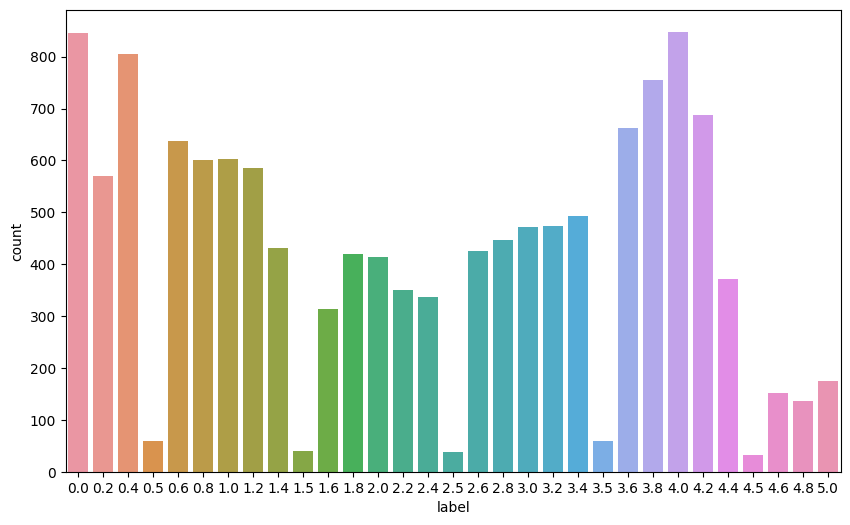

In [10]:
# augment train data
# swap sentence_1, sentence_2 which is label over 0.0
df_tmp = df_train[df_train['label'] > 0.0].copy()
df_tmp['sentence_1'], df_tmp['sentence_2'] = df_tmp['sentence_2'], df_tmp['sentence_1']
df_train = pd.concat([df_train, df_tmp], ignore_index=True)
plt.figure(figsize=(10,6))
sns.countplot(data = df_train,x = 'label')

In [11]:
df_train.to_csv('train.csv', index=False)